In [504]:
from bs4 import BeautifulSoup
import requests
import datetime
import time
import pandas as pd
import numpy as np
import json
import re
from pprint import pprint
import csv
import pickle

import warnings
warnings.filterwarnings('ignore')

In [503]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='darkgrid')
plt.rcParams["patch.force_edgecolor"]=True

In [12]:
kiva = pd.read_csv('/Users/travis/Downloads/kiva_ds_csv/loans.csv')
#kiva = pd.read_json('/Users/travis/Downloads/kiva_ds_json/loans.json')

In [13]:
kiva.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,657307,Aivy,English,"Aivy, 21 years of age, is single and lives in ...",NaN,125.0,125.0,funded,1511246.0,NaN,...,7.0,3,2,1,NaN,Aivy,female,true,irregular,field_partner
1,657259,Idalia Marizza,Spanish,"Doña Idalia, esta casada, tiene 57 años de eda...","Idalia, 57, is married and lives with her husb...",400.0,400.0,funded,1507947.0,NaN,...,8.0,11,2,1,NaN,Idalia Marizza,female,true,monthly,field_partner
2,658010,Aasia,English,Aasia is a 45-year-old married lady and she ha...,NaN,400.0,400.0,funded,1512245.0,NaN,...,14.0,16,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",Aasia,female,true,monthly,field_partner
3,659347,Gulmira,Russian,"Гулмире 36 лет, замужем, вместе с супругом вос...",Gulmira is 36 years old and married. She and ...,625.0,625.0,funded,1514419.0,NaN,...,14.0,21,2,1,user_favorite,Gulmira,female,true,monthly,field_partner
4,656933,Ricky\t,English,Ricky is a farmer who currently cultivates his...,NaN,425.0,425.0,funded,1506830.0,NaN,...,7.0,15,2,1,"#Animals, #Eco-friendly, #Sustainable Ag",Ricky\t,male,true,bullet,field_partner


In [14]:
kiva.drop(['ORIGINAL_LANGUAGE', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED',
           'IMAGE_ID', 'VIDEO_ID', 'TOWN_NAME', 'TAGS', 'BORROWER_NAMES',
           'BORROWER_PICTURED', 'LOAN_USE', 'COUNTRY_CODE'],
          axis=1,
          inplace=True)

In [15]:
kiva.describe()

,LOAN_ID,FUNDED_AMOUNT,LOAN_AMOUNT,CURRENCY_EXCHANGE_COVERAGE_RATE,PARTNER_ID,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.419607e+06,1.419607e+06,1.419607e+06,1.098081e+06,1.402817e+06,1.419583e+06,1.419607e+06,1.419607e+06,1.419607e+06
mean,7.233713e+05,7.961254e+02,8.322284e+02,1.163657e-01,1.496207e+02,1.305139e+01,2.225389e+01,1.502054e+00,1.134976e+00
std,4.156766e+05,1.034257e+03,1.080551e+03,3.699645e-02,8.769345e+01,7.566660e+00,2.777410e+01,9.903614e-01,4.950988e-01
min,8.400000e+01,0.000000e+00,2.500000e+01,1.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.642165e+05,2.750000e+02,3.000000e+02,1.000000e-01,9.800000e+01,8.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00
50%,7.240350e+05,5.000000e+02,5.000000e+02,1.000000e-01,1.390000e+02,1.200000e+01,1.500000e+01,1.000000e+00,1.000000e+00
75%,1.082972e+06,9.500000e+02,1.000000e+03,1.000000e-01,1.740000e+02,1.400000e+01,2.700000e+01,2.000000e+00,1.000000e+00
max,1.444085e+06,1.000000e+05,1.000000e+05,2.000000e-01,5.570000e+02,1.950000e+02,3.045000e+03,4.800000e+01,2.400000e+01


In [16]:
kiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419607 entries, 0 to 1419606
Data columns (total 23 columns):
LOAN_ID                            1419607 non-null int64
LOAN_NAME                          1372049 non-null object
FUNDED_AMOUNT                      1419607 non-null float64
LOAN_AMOUNT                        1419607 non-null float64
STATUS                             1419607 non-null object
ACTIVITY_NAME                      1419607 non-null object
SECTOR_NAME                        1419607 non-null object
COUNTRY_NAME                       1419607 non-null object
CURRENCY_POLICY                    1419607 non-null object
CURRENCY_EXCHANGE_COVERAGE_RATE    1098081 non-null float64
CURRENCY                           1419607 non-null object
PARTNER_ID                         1402817 non-null float64
POSTED_TIME                        1419607 non-null object
PLANNED_EXPIRATION_TIME            1047773 non-null object
DISBURSE_TIME                      1416794 non-null object

In [ ]:
kiva[(kiva['LOAN_AMOUNT'] > kiva['FUNDED_AMOUNT']) & (kiva['DISTRIBUTION_MODEL'] == 'direct')]

In [ ]:
kiva['COUNTRY_NAME'].value_counts()

In [ ]:
f, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='COUNTRY_NAME', data=kiva)

In [17]:
kiva.to_pickle('kiva.pkl')

In [18]:
#kiva = pd.read_pickle('kiva.pkl')

In [20]:
kiva2 = kiva.sample(50000)

In [22]:
kiva2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 96810 to 65664
Data columns (total 23 columns):
LOAN_ID                            50000 non-null int64
LOAN_NAME                          48308 non-null object
FUNDED_AMOUNT                      50000 non-null float64
LOAN_AMOUNT                        50000 non-null float64
STATUS                             50000 non-null object
ACTIVITY_NAME                      50000 non-null object
SECTOR_NAME                        50000 non-null object
COUNTRY_NAME                       50000 non-null object
CURRENCY_POLICY                    50000 non-null object
CURRENCY_EXCHANGE_COVERAGE_RATE    38772 non-null float64
CURRENCY                           50000 non-null object
PARTNER_ID                         49383 non-null float64
POSTED_TIME                        50000 non-null object
PLANNED_EXPIRATION_TIME            36869 non-null object
DISBURSE_TIME                      49896 non-null object
RAISED_TIME                  

In [24]:
kiva2.head()

,LOAN_ID,LOAN_NAME,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,...,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,BORROWER_GENDERS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
96810,486224,ROSEL,250.0,250.0,funded,Fruits & Vegetables,Food,Philippines,shared,0.1,...,2012-12-02 01:40:02.000 +0000,2012-10-10 07:00:00.000 +0000,2012-11-06 22:54:12.000 +0000,7.0,7,2,1,female,irregular,field_partner
606022,292769,Omar,1225.0,1225.0,funded,Farming,Agriculture,Georgia,shared,0.2,...,NaN,2011-04-08 07:00:00.000 +0000,2011-04-25 17:03:09.000 +0000,14.0,39,1,1,male,monthly,field_partner
694977,27002,Aurora Mateo,600.0,600.0,funded,Food Production/Sales,Food,Dominican Republic,not shared,NaN,...,NaN,2007-12-25 18:11:49.000 +0000,2007-12-11 18:11:49.000 +0000,8.0,18,1,1,female,monthly,field_partner
1099612,550132,Shermuhammad,850.0,850.0,funded,Cattle,Agriculture,Tajikistan,shared,0.1,...,2013-05-22 12:50:02.000 +0000,2013-04-04 07:00:00.000 +0000,2013-04-22 21:22:31.000 +0000,10.0,32,2,1,male,monthly,field_partner
930983,922644,Ansar,300.0,300.0,funded,Animal Sales,Agriculture,Pakistan,shared,0.1,...,2015-08-28 14:10:05.000 +0000,2015-07-08 07:00:00.000 +0000,2015-08-11 09:31:39.000 +0000,14.0,9,2,1,female,monthly,field_partner


In [40]:
kiva2['DISBURSE_TIME'] = pd.to_datetime(kiva2['DISBURSE_TIME'])
kiva2['PLANNED_EXPIRATION_TIME'] = pd.to_datetime(kiva2['PLANNED_EXPIRATION_TIME'])
kiva2['RAISED_TIME'] = pd.to_datetime(kiva2['RAISED_TIME'])
kiva2['POSTED_TIME'] = pd.to_datetime(kiva2['POSTED_TIME'])

In [41]:
kiva2['TIME_DELTA'] = kiva2['RAISED_TIME'] - kiva2['POSTED_TIME']

In [90]:
kiva2.columns

Index(['LOAN_ID', 'LOAN_NAME', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'ACTIVITY_NAME', 'SECTOR_NAME', 'COUNTRY_NAME', 'CURRENCY',
       'PARTNER_ID', 'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'BORROWER_GENDERS',
       'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL', 'TIME_DELTA'],
      dtype='object')

In [51]:
kiva2.drop(['CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY'], axis=1, inplace=True)

In [93]:
#i used to drop this, but I don't think I want to anymore
#kiva2.drop(['PARTNER_ID'], axis=1, inplace=True)

In [95]:
#kiva2.drop(['CURRENCY'], axis=1, inplace=True)

In [99]:
#kiva2.drop(['PLANNED_EXPIRATION_TIME'], axis=1, inplace=True)

In [332]:
kiva2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 96810 to 65664
Data columns (total 21 columns):
LOAN_ID                50000 non-null int64
LOAN_NAME              48308 non-null object
FUNDED_AMOUNT          50000 non-null float64
LOAN_AMOUNT            50000 non-null float64
STATUS                 50000 non-null object
ACTIVITY_NAME          50000 non-null object
SECTOR_NAME            50000 non-null object
COUNTRY_NAME           50000 non-null object
POSTED_TIME            50000 non-null datetime64[ns]
DISBURSE_TIME          49896 non-null datetime64[ns]
RAISED_TIME            47722 non-null datetime64[ns]
LENDER_TERM            49998 non-null float64
NUM_LENDERS_TOTAL      50000 non-null int64
NUM_JOURNAL_ENTRIES    50000 non-null int64
NUM_BULK_ENTRIES       50000 non-null int64
BORROWER_GENDERS       48477 non-null object
REPAYMENT_INTERVAL     50000 non-null object
DISTRIBUTION_MODEL     50000 non-null object
TIME_DELTA             47722 non-null timedelta64[ns]


In [333]:
#run to create a days column of number of days it takes a project to get funding.
#kiva2['DAYS'] = kiva2['TIME_DELTA']/np.timedelta64(1,'D')

In [160]:
def clean_log_funded(row):
    a = row.LOG_FUNDED
    if a<0:
        return np.nan
    else:
        return a

In [161]:
#run to scale the funding amount by log and drop null values
#kiva2['LOG_FUNDED'] = np.log(kiva2['FUNDED_AMOUNT'].dropna())
#run to clean LOG_FUNDED column
#kiva2['LOG_FUNDED'] = kiva2.apply(clean_log_funded, axis=1)

In [350]:
kiva2['FEMALE_BORROWERS'] = kiva2['BORROWER_GENDERS'].str.title().str.count('Female')
kiva2['MALE_BORROWERS'] = kiva2['BORROWER_GENDERS'].str.title().str.count('Male')
kiva2['BORROWERS_TOTAL'] = kiva2['FEMALE_BORROWERS'] + kiva2['MALE_BORROWERS']
kiva2['PRIMARY_GENDER'] = kiva2['FEMALE_BORROWERS'] - kiva2['MALE_BORROWERS']

In [355]:
kiva2['YEAR'] = kiva2['POSTED_TIME'].dt.year

In [356]:
kiva2['DoW'] = kiva2['POSTED_TIME'].dt.dayofweek

In [559]:
kiva2['PRIMARY_GENDER'][(kiva2['FEMALE_BORROWERS'] - kiva2['MALE_BORROWERS'] >=0)] = 1
kiva2['PRIMARY_GENDER'][((kiva2['FEMALE_BORROWERS'] - kiva2['MALE_BORROWERS']) <0)] = 0

In [341]:
#ensure that the timedelta for Days is a value greater than 0
def cleanDays(row):
    a = row.DAYS
    if a<0:
        return np.nan
    else:
        return a

In [342]:
#apply the function cleanDays to the dataframe reassigning negative values to nan. Time must pass forward!
#run when first creating the days column
#kiva2['DAYS'] = kiva2.apply(cleanDays, axis=1)

In [579]:
#run to create a new pickle of data
kiva2.to_pickle('kiva2_50k_sample_420.pkl')

In [343]:
#load in pickle of kiva2 data
#kiva2 = pd.read_pickle('kiva2_50k_sample.pkl')

In [334]:
#kiva2.nsmallest(15, 'DAYS')

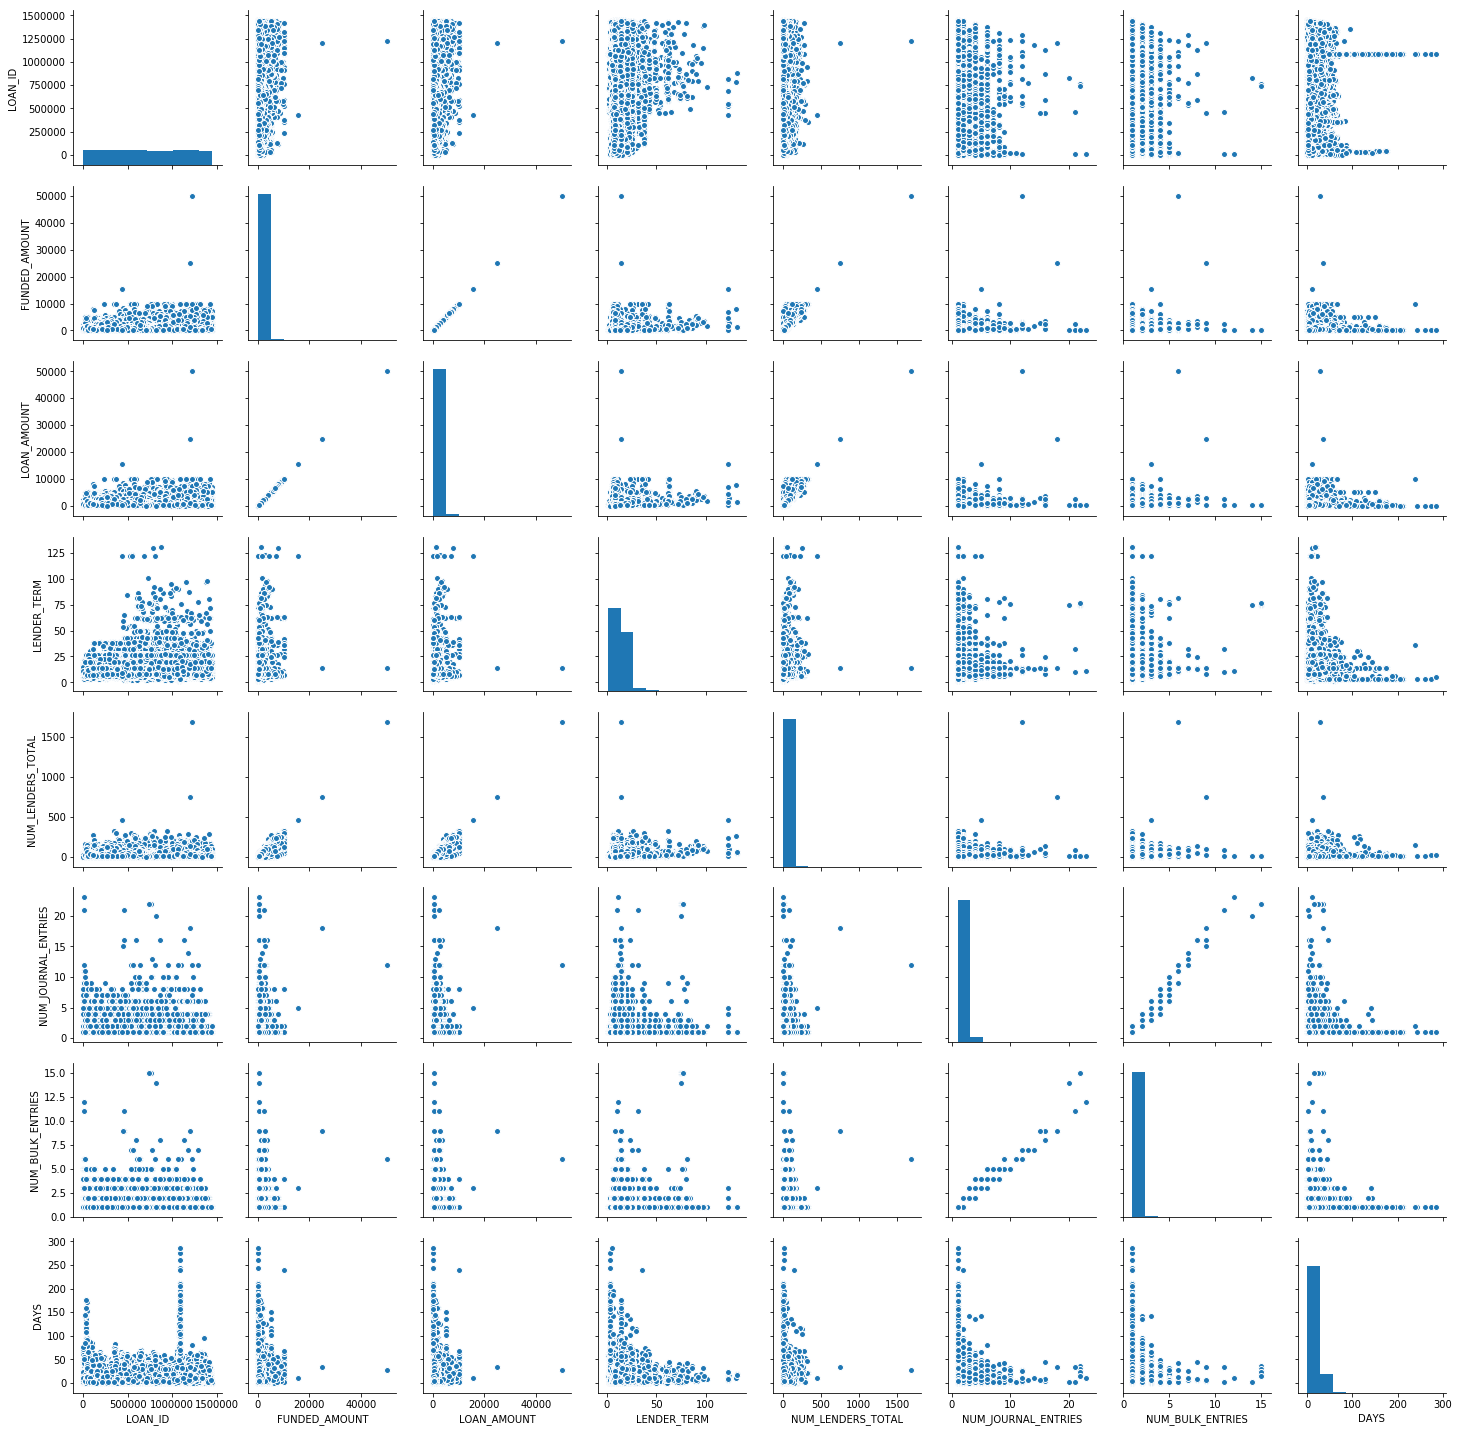

In [123]:
sns.pairplot(kiva2.dropna())

In [288]:
df = kiva2.COUNTRY_NAME.value_counts().nlargest(20).reset_index()
df.columns=['COUNTRY_NAME','count']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3140: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [465]:
#find the 20 most frequent countries
counts = kiva2.COUNTRY_NAME.value_counts().reset_index()

In [481]:
counts.columns=['COUNTRY_NAME', 'COUNT']

In [483]:
counts['log_count'] = np.log(counts['COUNT'])

In [463]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [490]:
data = dict(type = 'choropleth',
             colorscale = 'Viridis',
            reversescale = True,
             locations = counts['COUNTRY_NAME'],
             locationmode = "country names",
             z = counts['log_count'],
             text = counts['COUNT'],
             colorbar = {'title':'Scaled Frequency'})

In [491]:
layout = dict(title = 'Kiva Loan Frequency Data',
             geo = dict(showframe = False,
                       projection = {'type':'Mercator'}))

In [492]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

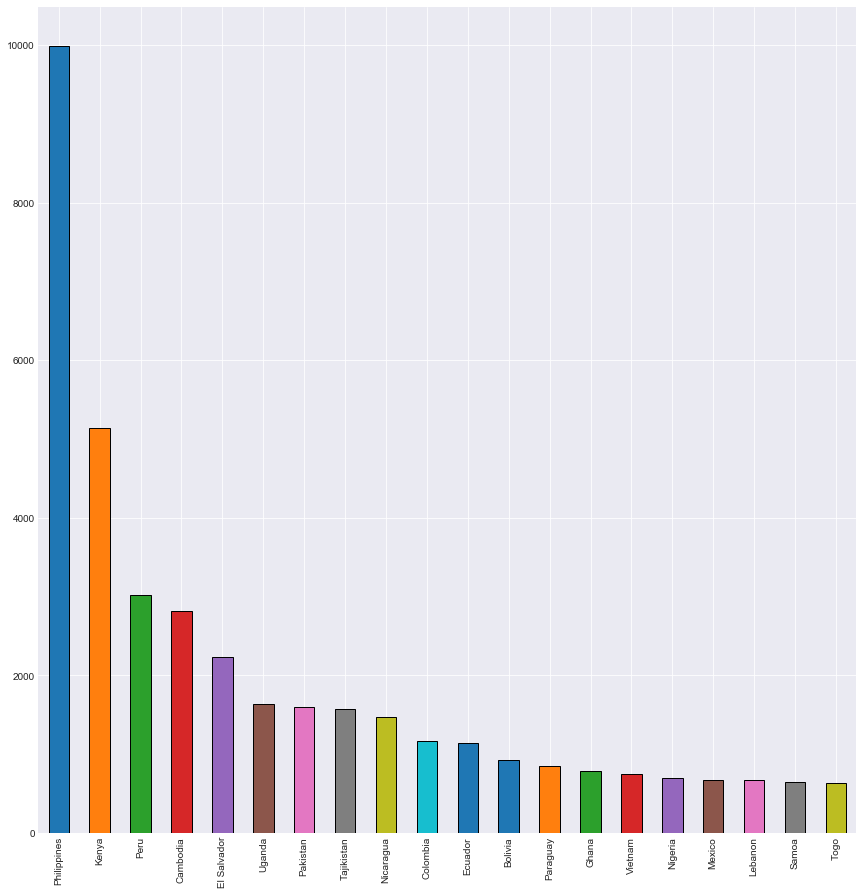

In [497]:
df = kiva2.COUNTRY_NAME.value_counts().nlargest(20)
fig, axs = plt.subplots(1,1, figsize=(12,12))
f = plt.tight_layout()
df.plot.bar()

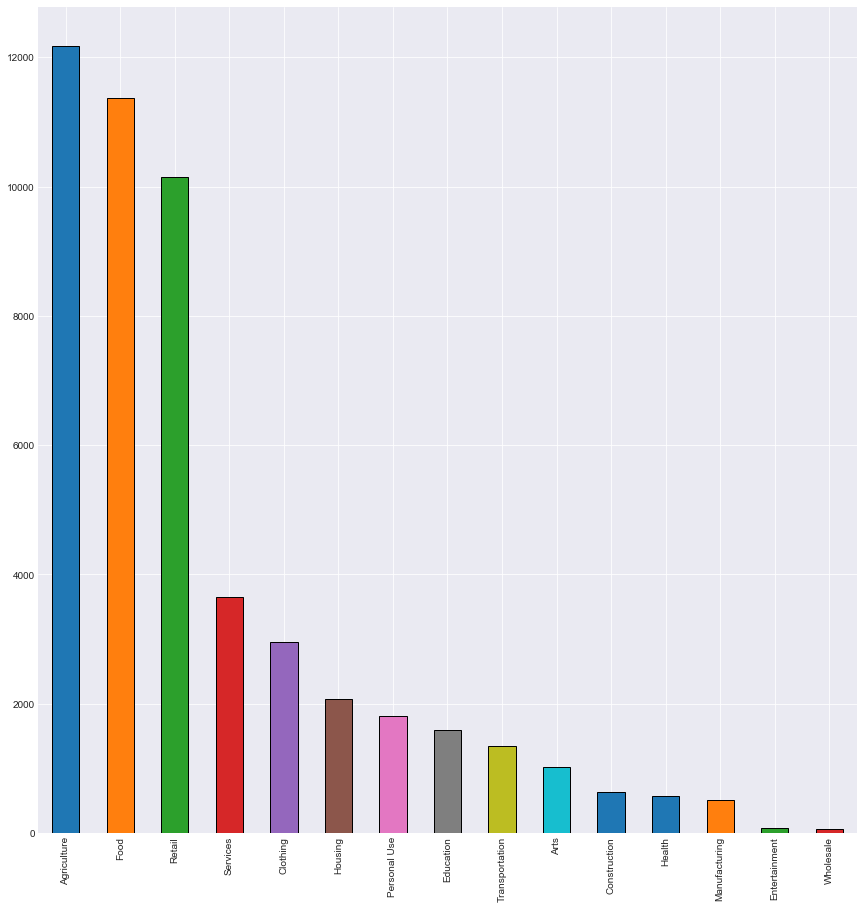

In [336]:
df = kiva2.SECTOR_NAME.value_counts()
fig, axs = plt.subplots(1,1, figsize=(12,12))
f = plt.tight_layout()
df.plot.bar()

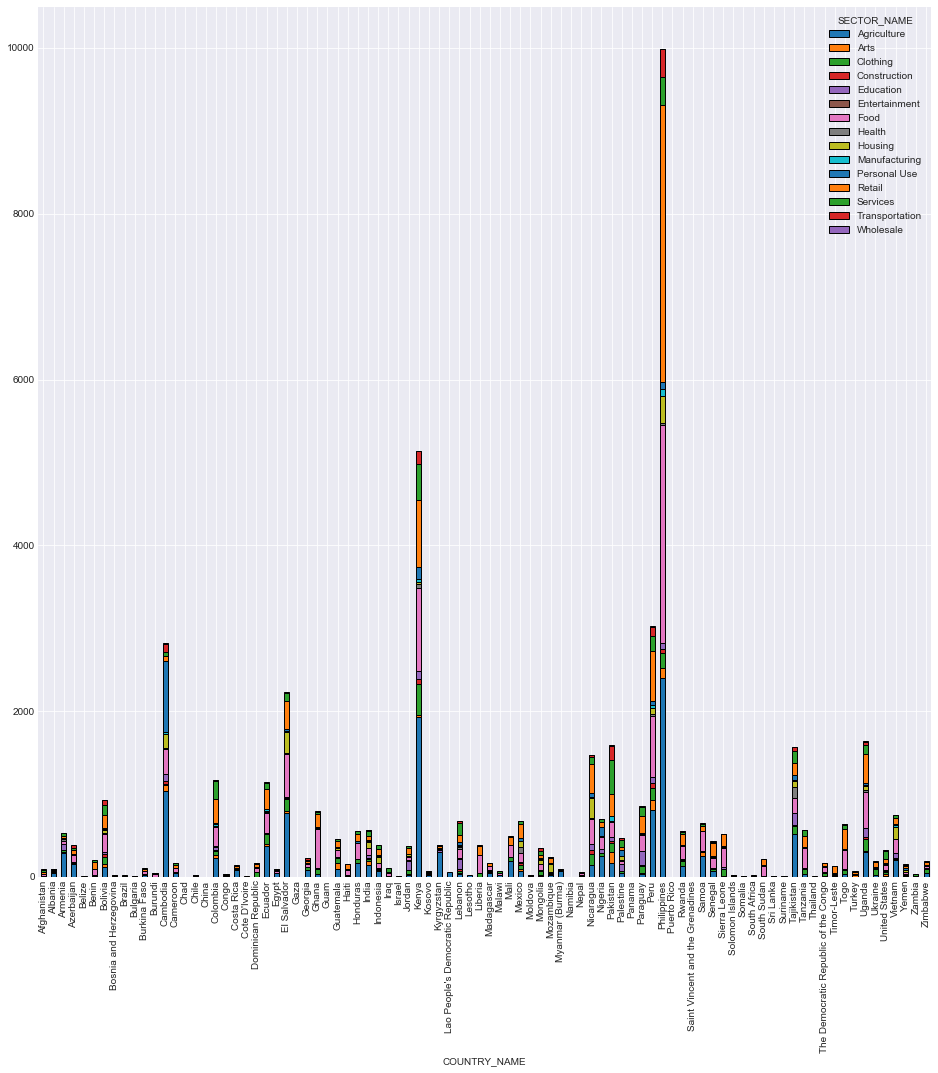

In [338]:
df_agg = kiva2.groupby(['COUNTRY_NAME'])['SECTOR_NAME'].value_counts().unstack()
df_agg.plot(kind='bar', stacked=True, figsize=(16,16))

In [ ]:
#kiva2['PRIMARY_GENDER']

In [352]:
#kiva2['main_gender']

In [329]:
#kiva2[kiva2['main_gender'] < 0] = 'Male'

In [ ]:
x_axis = kiva['DAYS']
y_axis = kiva['FUNDED_AMOUNT']
fig, axs = 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


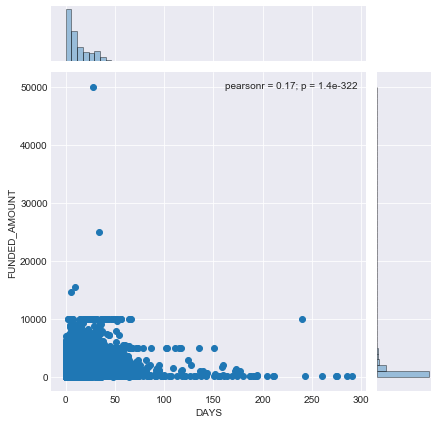

In [347]:
sns.jointplot(x='DAYS', y='FUNDED_AMOUNT', data=kiva2, kind='scatter')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


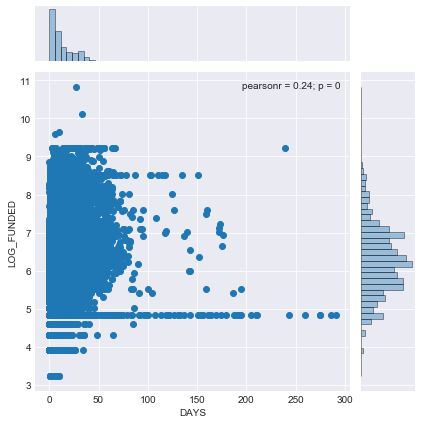

In [348]:
#viewing the correlation between days to funding and amount funded *scaled by log for better distribution*
sns.jointplot(x='DAYS', y='LOG_FUNDED', data=kiva2, kind='scatter')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


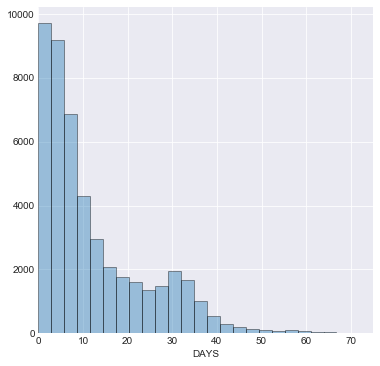

In [349]:
#plot of how long it takes projects to get funded
fig = plt.subplots(1,1, figsize=(6,6))
fig = plt.xlim(0, 75)
fig = plt.xlabel("Days to get funded")
sns.distplot(kiva2['DAYS'].dropna(), kde=False, bins = 100)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


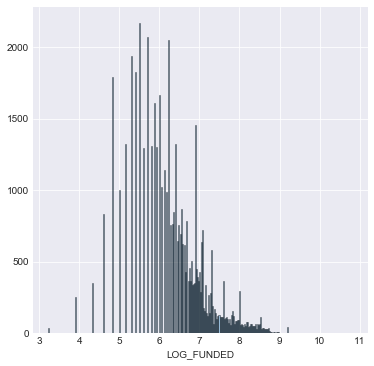

In [163]:
#plot of number of loans by size* size is scaled by log
fig = plt.subplots(1,1, figsize=(6,6))
fig = plt.xlim()
fig = plt.xlabel("Loan Size")
sns.distplot(kiva2['LOG_FUNDED'].dropna(), kde=False, bins = 300)

In [357]:
#create a new dataframe with no null values
kiva_no_null = kiva2.dropna()

In [358]:
kiva_no_null.drop(['LOAN_ID'], axis=1).groupby(['COUNTRY_NAME', 'SECTOR_NAME', 'STATUS','YEAR']).mean()

FUNDED_AMOUNT  LOAN_AMOUNT  \
COUNTRY_NAME SECTOR_NAME    STATUS YEAR                               
Afghanistan  Agriculture    funded 2007     225.000000   225.000000   
                                   2008    1075.000000  1075.000000   
             Arts           funded 2007     175.000000   175.000000   
                                   2008     900.000000   900.000000   
             Construction   funded 2007    1025.000000  1025.000000   
                                   2008    1075.000000  1075.000000   
                                   2009    1075.000000  1075.000000   
             Food           funded 2007     291.666667   291.666667   
                                   2008    1050.000000  1050.000000   
                                   2009     987.500000   987.500000   
             Health         funded 2008    1075.000000  1075.000000   
             Housing        funded 2007    1025.000000  1025.000000   
             Manufacturing  funded 2008    1062.500000  1062.500000   
             Personal Use   funded 2009    1075.000000  1075.000000   
             Retail         funded 2007     675.000000   675.000000   
                                   2009     635.000000   635.000000   
                                   2010     933.333333   933.333333   
             Services       funded 2007     425.000000   425.000000   
                                   2008     966.666667   966.666667   
                                   2009     820.000000   820.000000   
                                   2010     720.833333   720.833333   
             Transportation funded 2007     262.500000   262.500000   
Albania      Agriculture    funded 2012    1203.571429  1203.571429   
                                   2013    1579.545455  1579.545455   
                                   2014    2031.250000  2031.250000   
                                   2015    1193.750000  1193.750000   
                                   2016    1208.333333  1208.333333   
                                   2017    1375.000000  1375.000000   
             Clothing       funded 2012    1883.333333  1883.333333   
                                   2013     831.250000   831.250000   
...                                                ...          ...   
Zimbabwe     Clothing       funded 2012    2500.000000  2500.000000   
                                   2013    1000.000000  1000.000000   
                                   2014     475.000000   475.000000   
                                   2015    1143.750000  1143.750000   
                                   2016    1100.000000  1100.000000   
                                   2017     866.666667   866.666667   
             Construction   funded 2017    1300.000000  1300.000000   
             Education      funded 2015    1550.000000  1550.000000   
                                   2016    1000.000000  1000.000000   
                                   2017    1500.000000  1500.000000   
             Food           funded 2011    2183.333333  2183.333333   
                                   2013    1150.000000  1150.000000   
                                   2014     607.142857   607.142857   
                                   2015    1387.500000  1387.500000   
                                   2016     950.000000   950.000000   
                                   2017    1180.000000  1180.000000   
             Manufacturing  funded 2012    1300.000000  1300.000000   
                                   2013    1150.000000  1150.000000   
                                   2014    2000.000000  2000.000000   
                                   2017    1050.000000  1050.000000   
             Retail         funded 2011    1950.000000  1950.000000   
                                   2013     500.000000   500.000000   
                                   2014     776.470588   776.470588   
                                   2015    1200.000000  1200.0000

(0, 300)

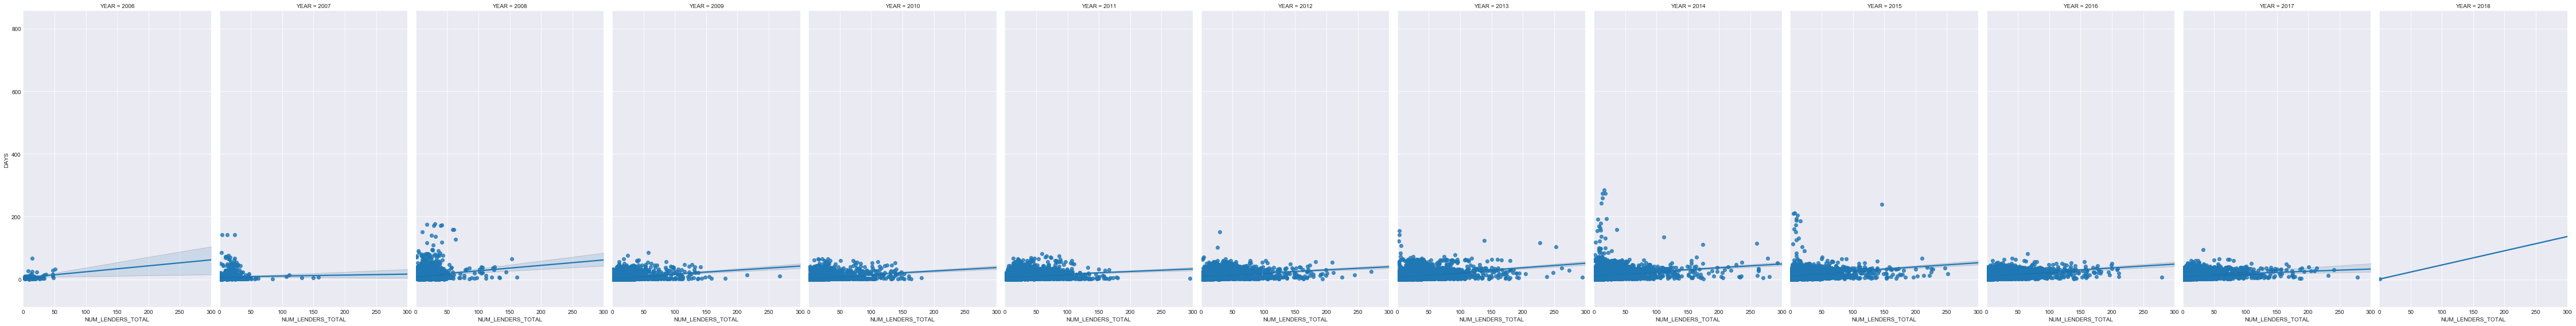

In [499]:
#create a plot of number of lenders vs total funded amount by year
lm = sns.lmplot(x='NUM_LENDERS_TOTAL', y='DAYS', data=kiva_no_null, col='YEAR', palette='coolwarm',
          aspect=.6, size=8)
axes = lm.axes
axes[0,0].set_xlim(0,300)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


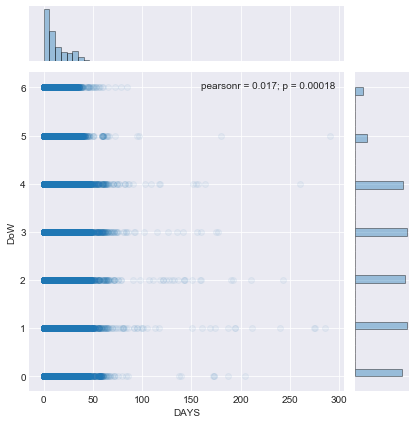

In [224]:
sns.jointplot(x='DAYS', y='DoW', data=kiva2, kind='scatter', alpha=.05)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


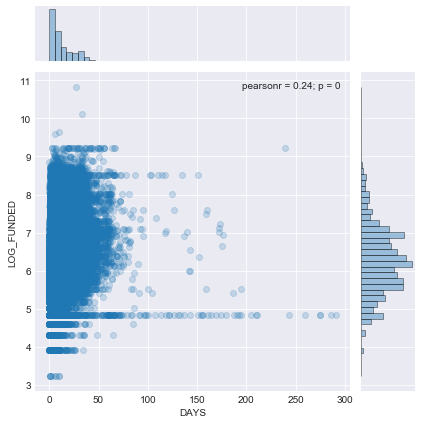

In [8]:
sns.jointplot(x='DAYS', y='LOG_FUNDED', data=kiva2, kind='scatter', alpha=.2)

In [364]:
kiva2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 96810 to 65664
Data columns (total 27 columns):
LOAN_ID                50000 non-null int64
LOAN_NAME              48308 non-null object
FUNDED_AMOUNT          50000 non-null float64
LOAN_AMOUNT            50000 non-null float64
STATUS                 50000 non-null object
ACTIVITY_NAME          50000 non-null object
SECTOR_NAME            50000 non-null object
COUNTRY_NAME           50000 non-null object
POSTED_TIME            50000 non-null datetime64[ns]
DISBURSE_TIME          49896 non-null datetime64[ns]
RAISED_TIME            47722 non-null datetime64[ns]
LENDER_TERM            49998 non-null float64
NUM_LENDERS_TOTAL      50000 non-null int64
NUM_JOURNAL_ENTRIES    50000 non-null int64
NUM_BULK_ENTRIES       50000 non-null int64
BORROWER_GENDERS       48477 non-null object
REPAYMENT_INTERVAL     50000 non-null object
DISTRIBUTION_MODEL     50000 non-null object
TIME_DELTA             47722 non-null timedelta64[ns]


In [161]:
grouping = kiva2.drop(['LOAN_ID'], axis=1).groupby(['COUNTRY_NAME', 'SECTOR_NAME', 'STATUS','YEAR','NUM_LENDERS_TOTAL']).mean()

In [425]:
#lr =LinearRegression()

#X=kiva3[['FUNDED_AMOUNT','LENDER_TERM', 'NUM_LENDERS_TOTAL', 'FEMALE_BORROWERS', 'BORROWERS_TOTAL', 'DoW',]]
#y=kiva3['DAYS']

#lr.fit(X,y)

In [ ]:
kiva3=kiva2.dropna()

In [410]:
lm1 = smf.ols('DAYS ~ FUNDED_AMOUNT + LENDER_TERM + NUM_LENDERS_TOTAL + FEMALE_BORROWERS + BORROWERS_TOTAL + DoW', data=kiva3)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DAYS   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     571.9
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:13:53   Log-Likelihood:            -1.8313e+05
No. Observations:               46105   AIC:                         3.663e+05
Df Residuals:                   46098   BIC:                         3.663e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.6227      0.155     49.180      0.000       7.319       7.926
FUNDED_AMOUNT         0.0009      0.000      6.793      0.000       0.001       0.001
LENDER_TERM           0.2029      0.009     23.172      0.000       0.186       0.220
NUM_LENDERS_TOTAL     0.0730      0.005     16.038      0.000       0.064       0.082
FEMALE_BORROWERS     -1.3692      0.070    -19.590      0.000      -1.506      -1.232
BORROWERS_TOTAL       0.9656      0.065     14.825      0.000       0.838       1.093
DoW                   0.1577      0.037      4.233      0.000       0.085       0.231
==============================================================================
Omnibus:                    38772.836   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3287375.776
Skew:                           3.570   Prob(JB):                         0.00
Kurtosis:                      43.746   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

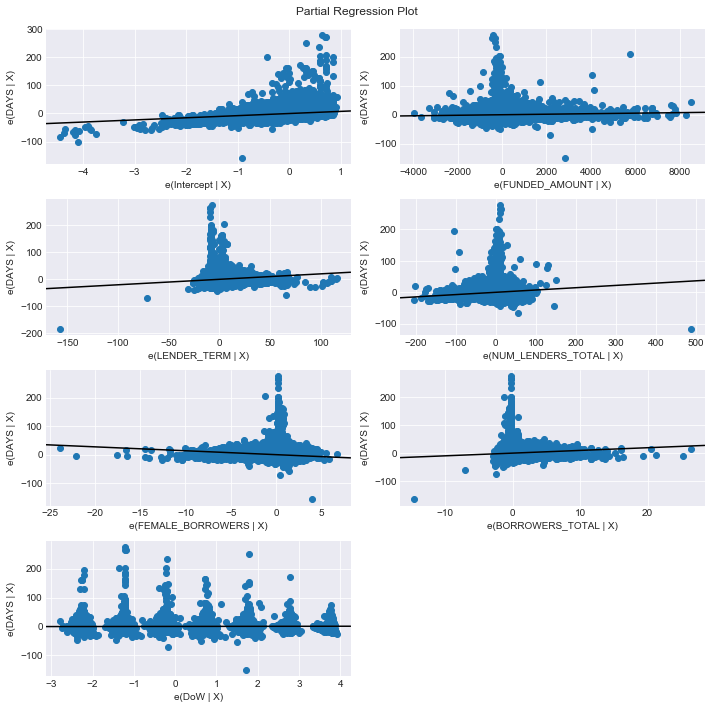

In [538]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_partregress_grid(fit1, fig=fig)
#plt.savefig('Partial_Regression.png', dpi=300)

In [429]:
X = patsy.dmatrix('COUNTRY_NAME',data=kiva3,return_type='dataframe')
X.head()

,Intercept,COUNTRY_NAME[T.Albania],COUNTRY_NAME[T.Armenia],COUNTRY_NAME[T.Azerbaijan],COUNTRY_NAME[T.Belize],COUNTRY_NAME[T.Benin],COUNTRY_NAME[T.Bolivia],COUNTRY_NAME[T.Bosnia and Herzegovina],COUNTRY_NAME[T.Brazil],COUNTRY_NAME[T.Bulgaria],...,COUNTRY_NAME[T.Timor-Leste],COUNTRY_NAME[T.Togo],COUNTRY_NAME[T.Turkey],COUNTRY_NAME[T.Uganda],COUNTRY_NAME[T.Ukraine],COUNTRY_NAME[T.United States],COUNTRY_NAME[T.Vietnam],COUNTRY_NAME[T.Yemen],COUNTRY_NAME[T.Zambia],COUNTRY_NAME[T.Zimbabwe]
96810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606022,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694977,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930983,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [433]:
kiva_country = kiva3.join(X)

In [536]:
kiva3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46105 entries, 96810 to 65664
Data columns (total 27 columns):
LOAN_ID                46105 non-null int64
LOAN_NAME              46105 non-null object
FUNDED_AMOUNT          46105 non-null float64
LOAN_AMOUNT            46105 non-null float64
STATUS                 46105 non-null object
ACTIVITY_NAME          46105 non-null object
SECTOR_NAME            46105 non-null object
COUNTRY_NAME           46105 non-null object
POSTED_TIME            46105 non-null datetime64[ns]
DISBURSE_TIME          46105 non-null datetime64[ns]
RAISED_TIME            46105 non-null datetime64[ns]
LENDER_TERM            46105 non-null float64
NUM_LENDERS_TOTAL      46105 non-null int64
NUM_JOURNAL_ENTRIES    46105 non-null int64
NUM_BULK_ENTRIES       46105 non-null int64
BORROWER_GENDERS       46105 non-null object
REPAYMENT_INTERVAL     46105 non-null object
DISTRIBUTION_MODEL     46105 non-null object
TIME_DELTA             46105 non-null timedelta64[ns]


In [439]:
kiva_country.head

Index(['LOAN_ID', 'LOAN_NAME', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'ACTIVITY_NAME', 'SECTOR_NAME', 'COUNTRY_NAME', 'POSTED_TIME',
       'DISBURSE_TIME',
       ...
       'COUNTRY_NAME[T.Timor-Leste]', 'COUNTRY_NAME[T.Togo]',
       'COUNTRY_NAME[T.Turkey]', 'COUNTRY_NAME[T.Uganda]',
       'COUNTRY_NAME[T.Ukraine]', 'COUNTRY_NAME[T.United States]',
       'COUNTRY_NAME[T.Vietnam]', 'COUNTRY_NAME[T.Yemen]',
       'COUNTRY_NAME[T.Zambia]', 'COUNTRY_NAME[T.Zimbabwe]'],
      dtype='object', length=112)

In [441]:
kiva_country.drop(['LOAN_NAME', 'LOAN_AMOUNT','ACTIVITY_NAME','COUNTRY_NAME','POSTED_TIME','DISBURSE_TIME','DISTRIBUTION_MODEL'], axis=1, inplace=True)

In [445]:
kiva_country.drop(['NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES','BORROWER_GENDERS'], axis=1, inplace=True)

In [447]:
kiva_country.drop(['RAISED_TIME'], axis=1, inplace=True)

In [534]:
kiva_country.columns

Index(['LOAN_ID', 'FUNDED_AMOUNT', 'STATUS', 'SECTOR_NAME', 'LENDER_TERM',
       'NUM_LENDERS_TOTAL', 'REPAYMENT_INTERVAL', 'TIME_DELTA', 'DAYS',
       'LOG_FUNDED',
       ...
       'COUNTRY_NAME[T.Timor-Leste]', 'COUNTRY_NAME[T.Togo]',
       'COUNTRY_NAME[T.Turkey]', 'COUNTRY_NAME[T.Uganda]',
       'COUNTRY_NAME[T.Ukraine]', 'COUNTRY_NAME[T.United States]',
       'COUNTRY_NAME[T.Vietnam]', 'COUNTRY_NAME[T.Yemen]',
       'COUNTRY_NAME[T.Zambia]', 'COUNTRY_NAME[T.Zimbabwe]'],
      dtype='object', length=101)

In [581]:
kiva3.to_pickle('kiva3.pkl')`

In [582]:
kiva_country.to_pickle('kiva_country.pkl')

In [500]:
X= kiva_country.drop(['LOAN_ID', 'STATUS', 'SECTOR_NAME','REPAYMENT_INTERVAL','TIME_DELTA', "YEAR"],1)
y=kiva_country.DAYS

In [516]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

1.0

In [501]:
lm2 = sm.OLS(y,X)
fit2 = lm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DAYS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.617e+31
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:22:00   Log-Likelihood:             1.3396e+06
No. Observations:               46105   AIC:                        -2.679e+06
Df Residuals:                   46012   BIC:                        -2.678e+06
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
FUNDED_AMOUNT                                         3.079e-17   7.43e-19     41.424      0.000    2.93e-17    3.23e-17
LENDER_TERM                                          -1.257e-15   4.79e-17    -26.208      0.000   -1.35e-15   -1.16e-15
NUM_LENDERS_TOTAL                                     7.279e-16   2.18e-17     33.351      0.000    6.85e-16    7.71e-16
DAYS                                                     1.0000   2.21e-17   4.54e+16      0.000       1.000       1.000
LOG_FUNDED                                           -1.099e-15   5.96e-16     -1.843      0.065   -2.27e-15    6.95e-17
FEMALE_BORROWERS                                      3.129e-16   4.53e-17      6.912      0.000    2.24e-16    4.02e-16
MALE_BORROWERS                                       -1.496e-16   1.05e-16     -1.422      0.155   -3.56e-16    5.66e-17
BORROWERS_TOTAL                                       6.979e-16   1.16e-16      6.006      0.000     4.7e-16    9.26e-16
PRIMARY_GENDER                                        4.694e-16   1.13e-16      4.161      0.000    2.48e-16    6.91e-16
DoW                                                   4.024e-16    1.7e-16      2.368      0.018    6.93e-17    7.35e-16
Intercept                                             2.969e-14   8.26e-15      3.594      0.000    1.35e-14    4.59e-14
COUNTRY_NAME[T.Albania]                               7.223e-15    9.7e-15      0.744      0.457   -1.18e-14    2.62e-14
COUNTRY_NAME[T.Armenia]                               2.252e-15   8.02e-15      0.281      0.779   -1.35e-14     1.8e-14
COUNTRY_NAME[T.Azerbaijan]                            5.133e-16    8.1e-15      0.063      0.949   -1.54e-14    1.64e-14
COUNTRY_NAME[T.Belize]                                4.562e-15   3.01e-14      0.152      0.879   -5.44e-14    6.35e-14
COUNTRY_NAME[T.Benin]                                 1.195e-14   8.59e-15      1.391      0.164   -4.89e-15    2.88e-14
COUNTRY_NAME[T.Bolivia]                              -1.929e-14   7.74e-15     -2.493      0.013   -3.45e-14   -4.12e-15
COUNTRY_NAME[T.Bosnia and Herzegovina]                6.962e-15   1.47e-14      0.472      0.637   -2.19e-14    3.59e-14
COUNTRY_NAME[T.Brazil]                               -1.081e-14    1.5e-14     -0.719      0.472   -4.03e-14    1.87e-14
COUNTRY_NAME[T.Bulgaria]                              -6.37e-15   1.99e-14     -0.320      0.749   -4.53e-14    3.26e-14
COUNTRY_NAME[T.Burkina Faso]                         -2.107e-14   9.44e-15     -2.232      0.026   -3.96e-14   -2.57e-15
COUNTRY_NAME[T.Burundi]                               2.621e-14   1.22e-14      2.145      0.032    2.26e-15    5.02e-14
COUNTRY_NAME[T.Cambodia]                              2.03

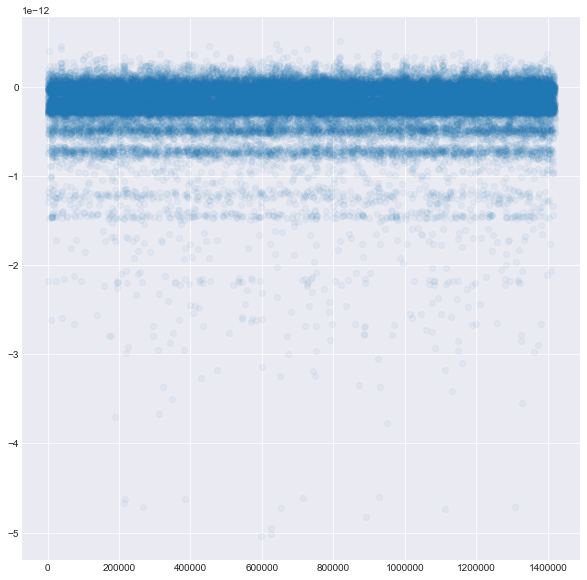

In [461]:
fit2.resid.plot(style='o', figsize=(10,10), alpha=.05)

In [389]:
#sns.regplot(x=X, y=y, data=kiva3)

In [542]:
#fig = plt.figure(figsize=(10,10))
#sm.graphics.plot_partregress(y, X, kiva_country['YEAR'])

IndexError: list index out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1182e8d90> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'update'

<Figure size 720x720 with 0 Axes>

AttributeError: 'NoneType' object has no attribute 'update'

<Figure size 432x288 with 1 Axes>

In [89]:
kiva3=kiva2.join(X)

In [390]:
p = lm1.fit().params

In [143]:
kiva3['YEAR'] = kiva3['POSTED_TIME'].dt.year

In [424]:
#Below here is exploratory data looking at things that did not receive funding. But not the direction I am going to go in.

In [556]:
#This creates a column with a 1 for a project primarily feature females and 0 for a project primarily featuring males
#kiva_no_NA['PRIMARY_GENDER'][(kiva_no_NA['FEMALE_BORROWERS'] - kiva_no_NA['MALE_BORROWERS'] >=0)] = 1
#kiva_no_NA['PRIMARY_GENDER'][((kiva_no_NA['FEMALE_BORROWERS'] - kiva_no_NA['MALE_BORROWERS']) <0)] = 0

In [555]:
#kiva_no_NA['PRIMARY_GENDER'].value_counts()

1.0    36066
0.0    10039
Name: PRIMARY_GENDER, dtype: int64

In [423]:
#kiva_not_funded = kiva3[(kiva3['DAYS'].isnull())]

In [422]:
#kiva_not_funded.head()

In [421]:
#kiva_not_funded['COUNTRY_NAME'].value_counts()

In [412]:
#kiva_not_funded['YEAR'] = kiva_not_funded['POSTED_TIME'].dt.year

In [413]:
#kiva_not_funded['YEAR'].value_counts()

In [414]:
#kiva3['SECTOR_NAME'].value_counts()

In [415]:
#percent_not_funded = kiva_not_funded['SECTOR_NAME'].value_counts() / kiva3['SECTOR_NAME'].value_counts()

In [416]:
#maybe something to look into more? is type of project an indicator in funding or not?
#percent_not_funded

In [417]:
#country_not_funded_percent = kiva_not_funded['COUNTRY_NAME'].value_counts() / kiva3['COUNTRY_NAME'].value_counts()

In [418]:
#Some countries have 100% not funded rate... but I also assume those countries have very few applications (1).
#I am sure this is something that needs a weighted measurement for prediction, but not sure how to capture it.
#Also this is just a small sample of 50k out of 1.4 million appplications total.
#country_not_funded_percent.dropna()

In [419]:
#year_not_funded_percent = kiva_not_funded['YEAR'].value_counts() / kiva3['YEAR'].value_counts()

In [420]:
#year_not_funded_percent

In [564]:
from mpl_toolkits.mplot3d import Axes3D

In [576]:
X=kiva2[['FUNDED_AMOUNT']]
y=kiva2.DAYS

In [577]:
X=sm.add_constant(X)

In [578]:
est = sm.OLS(y,X).fit()

In [ ]:
xx1,xx2 = np.meshgrid(np.linspace(X.FUNDED_AMOUNT.min()))

In [ ]:
lm1 = smf.ols('DAYS ~ FUNDED_AMOUNT + LENDER_TERM + NUM_LENDERS_TOTAL + FEMALE_BORROWERS + BORROWERS_TOTAL + DoW', data=kiva3)
fit1 = lm1.fit()
fit1.summary()